In [1]:
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import numpy as np
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
import itertools
import numpy as np
import scipy.sparse as sp
import networkx as nx
import copy
import argparse
from dgl.nn import SAGEConv
import os
import math



Using backend: pytorch


In [28]:
ncsr.ncsr[ncsr.ncsr['DSM_ADD'] == 1]['CASEID'].reset_index(drop='true').to_csv("out.csv")

In [2]:
torch.cuda.set_rng_state(torch.tensor([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 66, 188, 134, 184, 134, 78, 27, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.uint8))

torch.set_rng_state(torch.tensor([81, 152, 228, 169, 43, 129, 12, 197, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 81, 152, 228, 169, 0, 0, 0, 0, 192, 131, 249, 138, 0, 0, 0, 0, 140, 205, 65, 206, 0, 0, 0, 0, 110, 160, 224, 137, 0, 0, 0, 0, 160, 22, 109, 142, 0, 0, 0, 0, 239, 159, 148, 136, 0, 0, 0, 0, 135, 237, 179, 199, 0, 0, 0, 0, 27, 89, 180, 66, 0, 0, 0, 0, 74, 17, 140, 60, 0, 0, 0, 0, 59, 108, 137, 137, 0, 0, 0, 0, 135, 51, 177, 207, 0, 0, 0, 0, 31, 247, 22, 222, 0, 0, 0, 0, 24, 122, 17, 123, 0, 0, 0, 0, 234, 140, 235, 202, 0, 0, 0, 0, 251, 72, 182, 67, 0, 0, 0, 0, 177, 148, 206, 186, 0, 0, 0, 0, 175, 117, 249, 213, 0, 0, 0, 0, 237, 120, 24, 179, 0, 0, 0, 0, 93, 157, 232, 227, 0, 0, 0, 0, 41, 100, 143, 92, 0, 0, 0, 0, 220, 235, 67, 222, 0, 0, 0, 0, 16, 102, 31, 145, 0, 0, 0, 0, 48, 231, 128, 113, 0, 0, 0, 0, 108, 111, 235, 193, 0, 0, 0, 0, 227, 93, 142, 96, 0, 0, 0, 0, 67, 252, 150, 49, 0, 0, 0, 0, 137, 97, 102, 135, 0, 0, 0, 0, 242, 222, 100, 132, 0, 0, 0, 0, 204, 100, 170, 143, 0, 0, 0, 0, 99, 3, 206, 135, 0, 0, 0, 0, 99, 62, 189, 215, 0, 0, 0, 0, 255, 251, 170, 152, 0, 0, 0, 0, 241, 207, 58, 92, 0, 0, 0, 0, 209, 121, 11, 204, 0, 0, 0, 0, 252, 113, 118, 145, 0, 0, 0, 0, 89, 231, 173, 12, 0, 0, 0, 0, 65, 231, 217, 240, 0, 0, 0, 0, 47, 143, 136, 205, 0, 0, 0, 0, 130, 8, 179, 165, 0, 0, 0, 0, 167, 218, 174, 106, 0, 0, 0, 0, 166, 25, 137, 172, 0, 0, 0, 0, 221, 225, 75, 84, 0, 0, 0, 0, 246, 215, 210, 218, 0, 0, 0, 0, 212, 80, 116, 110, 0, 0, 0, 0, 53, 225, 248, 228, 0, 0, 0, 0, 123, 192, 48, 119, 0, 0, 0, 0, 80, 58, 147, 216, 0, 0, 0, 0, 238, 109, 145, 216, 0, 0, 0, 0, 177, 51, 175, 66, 0, 0, 0, 0, 161, 148, 152, 187, 0, 0, 0, 0, 129, 223, 50, 127, 0, 0, 0, 0, 179, 173, 45, 133, 0, 0, 0, 0, 9, 64, 208, 104, 0, 0, 0, 0, 93, 139, 165, 236, 0, 0, 0, 0, 76, 74, 119, 108, 0, 0, 0, 0, 152, 133, 238, 37, 0, 0, 0, 0, 48, 13, 193, 99, 0, 0, 0, 0, 142, 109, 144, 179, 0, 0, 0, 0, 118, 36, 111, 49, 0, 0, 0, 0, 201, 136, 150, 194, 0, 0, 0, 0, 238, 17, 30, 74, 0, 0, 0, 0, 136, 250, 254, 166, 0, 0, 0, 0, 176, 178, 114, 104, 0, 0, 0, 0, 20, 57, 184, 37, 0, 0, 0, 0, 36, 57, 198, 119, 0, 0, 0, 0, 218, 88, 204, 129, 0, 0, 0, 0, 122, 165, 18, 31, 0, 0, 0, 0, 101, 147, 63, 59, 0, 0, 0, 0, 29, 52, 185, 9, 0, 0, 0, 0, 182, 20, 192, 155, 0, 0, 0, 0, 74, 127, 200, 190, 0, 0, 0, 0, 175, 191, 47, 108, 0, 0, 0, 0, 238, 189, 44, 226, 0, 0, 0, 0, 202, 195, 197, 90, 0, 0, 0, 0, 97, 226, 90, 164, 0, 0, 0, 0, 90, 76, 183, 111, 0, 0, 0, 0, 51, 211, 170, 165, 0, 0, 0, 0, 162, 139, 193, 57, 0, 0, 0, 0, 56, 201, 131, 134, 0, 0, 0, 0, 49, 110, 68, 145, 0, 0, 0, 0, 111, 197, 93, 118, 0, 0, 0, 0, 183, 194, 168, 175, 0, 0, 0, 0, 187, 174, 186, 76, 0, 0, 0, 0, 181, 121, 62, 108, 0, 0, 0, 0, 88, 88, 179, 103, 0, 0, 0, 0, 114, 124, 120, 218, 0, 0, 0, 0, 235, 145, 56, 191, 0, 0, 0, 0, 68, 66, 198, 0, 0, 0, 0, 0, 44, 137, 138, 231, 0, 0, 0, 0, 228, 70, 91, 17, 0, 0, 0, 0, 78, 252, 46, 210, 0, 0, 0, 0, 188, 191, 169, 115, 0, 0, 0, 0, 237, 202, 191, 115, 0, 0, 0, 0, 121, 91, 183, 106, 0, 0, 0, 0, 182, 78, 146, 90, 0, 0, 0, 0, 146, 253, 217, 98, 0, 0, 0, 0, 95, 182, 185, 155, 0, 0, 0, 0, 18, 184, 103, 11, 0, 0, 0, 0, 124, 65, 235, 161, 0, 0, 0, 0, 25, 69, 79, 186, 0, 0, 0, 0, 11, 183, 254, 52, 0, 0, 0, 0, 188, 26, 192, 221, 0, 0, 0, 0, 193, 196, 83, 154, 0, 0, 0, 0, 86, 252, 173, 92, 0, 0, 0, 0, 187, 29, 16, 71, 0, 0, 0, 0, 203, 68, 90, 241, 0, 0, 0, 0, 82, 43, 228, 200, 0, 0, 0, 0, 96, 112, 106, 184, 0, 0, 0, 0, 22, 201, 208, 34, 0, 0, 0, 0, 27, 28, 150, 63, 0, 0, 0, 0, 21, 138, 0, 148, 0, 0, 0, 0, 130, 202, 189, 40, 0, 0, 0, 0, 186, 119, 206, 5, 0, 0, 0, 0, 211, 198, 157, 134, 0, 0, 0, 0, 231, 73, 92, 39, 0, 0, 0, 0, 150, 199, 70, 100, 0, 0, 0, 0, 7, 142, 221, 153, 0, 0, 0, 0, 110, 181, 140, 67, 0, 0, 0, 0, 65, 252, 164, 189, 0, 0, 0, 0, 230, 97, 236, 70, 0, 0, 0, 0, 155, 63, 248, 156, 0, 0, 0, 0, 214, 248, 40, 17, 0, 0, 0, 0, 232, 178, 46, 200, 0, 0, 0, 0, 50, 90, 153, 0, 0, 0, 0, 0, 54, 88, 35, 221, 0, 0, 0, 0, 102, 42, 153, 238, 0, 0, 0, 0, 87, 199, 224, 222, 0, 0, 0, 0, 163, 152, 166, 28, 0, 0, 0, 0, 207, 115, 222, 101, 0, 0, 0, 0, 199, 238, 94, 79, 0, 0, 0, 0, 160, 42, 166, 45, 0, 0, 0, 0, 163, 113, 190, 153, 0, 0, 0, 0, 9, 254, 88, 154, 0, 0, 0, 0, 220, 29, 93, 27, 0, 0, 0, 0, 82, 132, 187, 65, 0, 0, 0, 0, 70, 160, 16, 235, 0, 0, 0, 0, 193, 40, 55, 33, 0, 0, 0, 0, 174, 93, 217, 40, 0, 0, 0, 0, 48, 20, 166, 104, 0, 0, 0, 0, 224, 48, 171, 99, 0, 0, 0, 0, 81, 178, 217, 49, 0, 0, 0, 0, 130, 179, 135, 55, 0, 0, 0, 0, 216, 100, 40, 72, 0, 0, 0, 0, 44, 235, 214, 99, 0, 0, 0, 0, 81, 222, 224, 209, 0, 0, 0, 0, 235, 152, 239, 208, 0, 0, 0, 0, 26, 124, 179, 181, 0, 0, 0, 0, 11, 206, 224, 65, 0, 0, 0, 0, 134, 164, 58, 38, 0, 0, 0, 0, 115, 159, 216, 126, 0, 0, 0, 0, 144, 234, 232, 108, 0, 0, 0, 0, 204, 36, 99, 51, 0, 0, 0, 0, 20, 177, 98, 102, 0, 0, 0, 0, 226, 26, 71, 233, 0, 0, 0, 0, 95, 4, 151, 190, 0, 0, 0, 0, 76, 126, 117, 93, 0, 0, 0, 0, 253, 9, 13, 176, 0, 0, 0, 0, 56, 105, 119, 73, 0, 0, 0, 0, 27, 5, 251, 207, 0, 0, 0, 0, 23, 219, 106, 167, 0, 0, 0, 0, 233, 172, 249, 21, 0, 0, 0, 0, 142, 233, 104, 79, 0, 0, 0, 0, 13, 173, 74, 48, 0, 0, 0, 0, 196, 59, 109, 59, 0, 0, 0, 0, 248, 120, 112, 57, 0, 0, 0, 0, 125, 114, 228, 200, 0, 0, 0, 0, 92, 154, 216, 204, 0, 0, 0, 0, 34, 191, 170, 8, 0, 0, 0, 0, 18, 155, 148, 93, 0, 0, 0, 0, 40, 90, 35, 180, 0, 0, 0, 0, 60, 13, 89, 44, 0, 0, 0, 0, 87, 85, 219, 211, 0, 0, 0, 0, 208, 158, 126, 187, 0, 0, 0, 0, 135, 11, 177, 171, 0, 0, 0, 0, 39, 185, 166, 232, 0, 0, 0, 0, 227, 79, 215, 66, 0, 0, 0, 0, 218, 118, 224, 31, 0, 0, 0, 0, 179, 142, 31, 235, 0, 0, 0, 0, 34, 124, 159, 205, 0, 0, 0, 0, 184, 162, 64, 202, 0, 0, 0, 0, 123, 71, 179, 185, 0, 0, 0, 0, 114, 244, 73, 53, 0, 0, 0, 0, 176, 115, 28, 97, 0, 0, 0, 0, 140, 94, 250, 95, 0, 0, 0, 0, 89, 195, 59, 236, 0, 0, 0, 0, 59, 61, 149, 126, 0, 0, 0, 0, 156, 50, 59, 243, 0, 0, 0, 0, 118, 16, 203, 26, 0, 0, 0, 0, 74, 165, 38, 121, 0, 0, 0, 0, 84, 90, 193, 163, 0, 0, 0, 0, 172, 170, 250, 212, 0, 0, 0, 0, 202, 254, 5, 171, 0, 0, 0, 0, 168, 141, 46, 6, 0, 0, 0, 0, 9, 204, 196, 25, 0, 0, 0, 0, 79, 81, 20, 220, 0, 0, 0, 0, 191, 191, 153, 252, 0, 0, 0, 0, 240, 65, 104, 126, 0, 0, 0, 0, 218, 253, 2, 36, 0, 0, 0, 0, 200, 209, 253, 183, 0, 0, 0, 0, 121, 223, 238, 96, 0, 0, 0, 0, 32, 99, 29, 208, 0, 0, 0, 0, 152, 216, 154, 79, 0, 0, 0, 0, 39, 86, 48, 190, 0, 0, 0, 0, 100, 202, 46, 222, 0, 0, 0, 0, 111, 250, 151, 175, 0, 0, 0, 0, 206, 34, 245, 112, 0, 0, 0, 0, 121, 131, 0, 8, 0, 0, 0, 0, 140, 160, 222, 18, 0, 0, 0, 0, 12, 68, 148, 9, 0, 0, 0, 0, 141, 69, 61, 12, 0, 0, 0, 0, 115, 230, 63, 1, 0, 0, 0, 0, 50, 119, 174, 129, 0, 0, 0, 0, 196, 182, 237, 9, 0, 0, 0, 0, 41, 0, 244, 208, 0, 0, 0, 0, 104, 139, 128, 189, 0, 0, 0, 0, 169, 187, 56, 22, 0, 0, 0, 0, 133, 123, 110, 142, 0, 0, 0, 0, 28, 252, 98, 166, 0, 0, 0, 0, 176, 134, 203, 42, 0, 0, 0, 0, 75, 84, 48, 188, 0, 0, 0, 0, 169, 82, 43, 54, 0, 0, 0, 0, 138, 14, 243, 28, 0, 0, 0, 0, 80, 151, 114, 28, 0, 0, 0, 0, 111, 131, 95, 111, 0, 0, 0, 0, 70, 185, 6, 14, 0, 0, 0, 0, 127, 143, 183, 186, 0, 0, 0, 0, 51, 130, 160, 142, 0, 0, 0, 0, 56, 151, 86, 102, 0, 0, 0, 0, 97, 43, 166, 229, 0, 0, 0, 0, 143, 144, 116, 15, 0, 0, 0, 0, 81, 144, 66, 194, 0, 0, 0, 0, 65, 211, 188, 205, 0, 0, 0, 0, 242, 171, 91, 215, 0, 0, 0, 0, 254, 207, 197, 101, 0, 0, 0, 0, 133, 135, 83, 71, 0, 0, 0, 0, 255, 27, 22, 60, 0, 0, 0, 0, 135, 131, 173, 225, 0, 0, 0, 0, 1, 136, 114, 45, 0, 0, 0, 0, 83, 50, 255, 92, 0, 0, 0, 0, 73, 189, 218, 58, 0, 0, 0, 0, 189, 191, 151, 64, 0, 0, 0, 0, 29, 66, 158, 63, 0, 0, 0, 0, 99, 155, 156, 213, 0, 0, 0, 0, 211, 173, 143, 213, 0, 0, 0, 0, 4, 228, 99, 166, 0, 0, 0, 0, 83, 45, 154, 222, 0, 0, 0, 0, 134, 177, 67, 82, 0, 0, 0, 0, 58, 74, 103, 125, 0, 0, 0, 0, 63, 221, 22, 172, 0, 0, 0, 0, 10, 239, 21, 234, 0, 0, 0, 0, 135, 32, 210, 108, 0, 0, 0, 0, 217, 139, 248, 205, 0, 0, 0, 0, 254, 215, 220, 16, 0, 0, 0, 0, 51, 38, 170, 230, 0, 0, 0, 0, 238, 193, 224, 90, 0, 0, 0, 0, 74, 107, 254, 67, 0, 0, 0, 0, 151, 120, 216, 141, 0, 0, 0, 0, 202, 80, 2, 247, 0, 0, 0, 0, 79, 113, 164, 178, 0, 0, 0, 0, 100, 233, 157, 16, 0, 0, 0, 0, 120, 153, 239, 161, 0, 0, 0, 0, 39, 216, 255, 198, 0, 0, 0, 0, 58, 139, 151, 134, 0, 0, 0, 0, 31, 230, 210, 161, 0, 0, 0, 0, 121, 79, 37, 60, 0, 0, 0, 0, 198, 28, 143, 234, 0, 0, 0, 0, 195, 199, 62, 6, 0, 0, 0, 0, 250, 43, 1, 202, 0, 0, 0, 0, 73, 155, 205, 146, 0, 0, 0, 0, 164, 104, 70, 214, 0, 0, 0, 0, 241, 169, 89, 136, 0, 0, 0, 0, 238, 24, 248, 240, 0, 0, 0, 0, 145, 171, 179, 129, 0, 0, 0, 0, 16, 93, 185, 7, 0, 0, 0, 0, 98, 72, 95, 138, 0, 0, 0, 0, 243, 238, 242, 15, 0, 0, 0, 0, 243, 81, 93, 89, 0, 0, 0, 0, 143, 215, 73, 136, 0, 0, 0, 0, 183, 128, 87, 170, 0, 0, 0, 0, 128, 165, 89, 233, 0, 0, 0, 0, 199, 104, 134, 212, 0, 0, 0, 0, 109, 58, 116, 84, 0, 0, 0, 0, 182, 217, 18, 174, 0, 0, 0, 0, 31, 57, 221, 167, 0, 0, 0, 0, 141, 14, 163, 105, 0, 0, 0, 0, 89, 170, 241, 101, 0, 0, 0, 0, 214, 77, 233, 84, 0, 0, 0, 0, 242, 197, 148, 47, 0, 0, 0, 0, 154, 155, 62, 229, 0, 0, 0, 0, 126, 69, 39, 192, 0, 0, 0, 0, 115, 80, 25, 118, 0, 0, 0, 0, 29, 192, 39, 111, 0, 0, 0, 0, 48, 200, 65, 49, 0, 0, 0, 0, 21, 172, 101, 92, 0, 0, 0, 0, 10, 153, 191, 1, 0, 0, 0, 0, 25, 188, 195, 160, 0, 0, 0, 0, 207, 170, 160, 181, 0, 0, 0, 0, 10, 25, 102, 203, 0, 0, 0, 0, 183, 178, 236, 93, 0, 0, 0, 0, 249, 232, 255, 100, 0, 0, 0, 0, 4, 163, 107, 203, 0, 0, 0, 0, 240, 17, 231, 68, 0, 0, 0, 0, 67, 14, 91, 1, 0, 0, 0, 0, 158, 124, 99, 235, 0, 0, 0, 0, 33, 48, 59, 192, 0, 0, 0, 0, 155, 48, 10, 45, 0, 0, 0, 0, 89, 33, 69, 241, 0, 0, 0, 0, 181, 83, 149, 16, 0, 0, 0, 0, 157, 228, 168, 26, 0, 0, 0, 0, 38, 56, 69, 99, 0, 0, 0, 0, 153, 7, 109, 50, 0, 0, 0, 0, 148, 225, 67, 255, 0, 0, 0, 0, 203, 208, 162, 232, 0, 0, 0, 0, 33, 104, 111, 255, 0, 0, 0, 0, 164, 72, 156, 150, 0, 0, 0, 0, 185, 128, 19, 19, 0, 0, 0, 0, 57, 203, 163, 135, 0, 0, 0, 0, 132, 194, 254, 157, 0, 0, 0, 0, 28, 118, 70, 133, 0, 0, 0, 0, 21, 169, 212, 44, 0, 0, 0, 0, 137, 243, 245, 249, 0, 0, 0, 0, 179, 240, 35, 30, 0, 0, 0, 0, 225, 194, 226, 56, 0, 0, 0, 0, 8, 77, 232, 11, 0, 0, 0, 0, 108, 173, 23, 127, 0, 0, 0, 0, 70, 194, 33, 138, 0, 0, 0, 0, 26, 10, 36, 144, 0, 0, 0, 0, 191, 212, 70, 142, 0, 0, 0, 0, 217, 20, 246, 150, 0, 0, 0, 0, 176, 110, 60, 54, 0, 0, 0, 0, 186, 220, 227, 3, 0, 0, 0, 0, 173, 160, 27, 251, 0, 0, 0, 0, 242, 131, 165, 167, 0, 0, 0, 0, 253, 126, 120, 147, 0, 0, 0, 0, 233, 146, 121, 183, 0, 0, 0, 0, 6, 187, 3, 155, 0, 0, 0, 0, 228, 237, 169, 244, 0, 0, 0, 0, 116, 124, 172, 108, 0, 0, 0, 0, 123, 184, 218, 241, 0, 0, 0, 0, 171, 0, 75, 35, 0, 0, 0, 0, 203, 199, 159, 56, 0, 0, 0, 0, 108, 119, 130, 243, 0, 0, 0, 0, 33, 135, 108, 252, 0, 0, 0, 0, 193, 131, 16, 181, 0, 0, 0, 0, 71, 88, 92, 36, 0, 0, 0, 0, 92, 212, 157, 33, 0, 0, 0, 0, 166, 5, 110, 88, 0, 0, 0, 0, 62, 155, 255, 95, 0, 0, 0, 0, 55, 248, 165, 124, 0, 0, 0, 0, 171, 212, 201, 144, 0, 0, 0, 0, 11, 89, 14, 63, 0, 0, 0, 0, 182, 5, 157, 161, 0, 0, 0, 0, 100, 149, 236, 226, 0, 0, 0, 0, 4, 18, 28, 173, 0, 0, 0, 0, 192, 83, 226, 87, 0, 0, 0, 0, 136, 85, 100, 129, 0, 0, 0, 0, 214, 154, 34, 77, 0, 0, 0, 0, 56, 39, 101, 227, 0, 0, 0, 0, 173, 14, 132, 207, 0, 0, 0, 0, 13, 234, 182, 89, 0, 0, 0, 0, 36, 196, 190, 190, 0, 0, 0, 0, 103, 186, 69, 189, 0, 0, 0, 0, 67, 152, 5, 178, 0, 0, 0, 0, 16, 220, 118, 208, 0, 0, 0, 0, 235, 255, 47, 227, 0, 0, 0, 0, 245, 31, 59, 49, 0, 0, 0, 0, 23, 186, 32, 76, 0, 0, 0, 0, 29, 50, 25, 235, 0, 0, 0, 0, 70, 213, 148, 67, 0, 0, 0, 0, 116, 37, 204, 24, 0, 0, 0, 0, 54, 220, 193, 254, 0, 0, 0, 0, 92, 63, 199, 162, 0, 0, 0, 0, 138, 79, 23, 61, 0, 0, 0, 0, 231, 60, 137, 248, 0, 0, 0, 0, 106, 11, 247, 89, 0, 0, 0, 0, 174, 197, 128, 39, 0, 0, 0, 0, 30, 29, 90, 79, 0, 0, 0, 0, 180, 21, 252, 103, 0, 0, 0, 0, 227, 110, 5, 226, 0, 0, 0, 0, 219, 159, 154, 156, 0, 0, 0, 0, 25, 51, 123, 115, 0, 0, 0, 0, 245, 1, 155, 3, 0, 0, 0, 0, 39, 228, 230, 201, 0, 0, 0, 0, 179, 71, 43, 165, 0, 0, 0, 0, 85, 3, 72, 245, 0, 0, 0, 0, 111, 88, 140, 174, 0, 0, 0, 0, 131, 57, 172, 95, 0, 0, 0, 0, 205, 67, 71, 84, 0, 0, 0, 0, 0, 237, 249, 77, 0, 0, 0, 0, 234, 11, 119, 106, 0, 0, 0, 0, 61, 120, 197, 45, 0, 0, 0, 0, 152, 22, 236, 193, 0, 0, 0, 0, 175, 223, 122, 220, 0, 0, 0, 0, 101, 76, 225, 107, 0, 0, 0, 0, 254, 168, 128, 104, 0, 0, 0, 0, 38, 37, 44, 72, 0, 0, 0, 0, 239, 136, 93, 145, 0, 0, 0, 0, 14, 220, 168, 34, 0, 0, 0, 0, 20, 81, 196, 246, 0, 0, 0, 0, 162, 78, 122, 86, 0, 0, 0, 0, 223, 66, 203, 124, 0, 0, 0, 0, 39, 49, 12, 127, 0, 0, 0, 0, 144, 187, 38, 6, 0, 0, 0, 0, 99, 17, 152, 8, 0, 0, 0, 0, 163, 216, 1, 3, 0, 0, 0, 0, 228, 180, 30, 221, 0, 0, 0, 0, 185, 255, 61, 18, 0, 0, 0, 0, 148, 230, 94, 106, 0, 0, 0, 0, 97, 183, 233, 234, 0, 0, 0, 0, 67, 205, 6, 29, 0, 0, 0, 0, 9, 216, 92, 248, 0, 0, 0, 0, 141, 151, 132, 204, 0, 0, 0, 0, 162, 202, 76, 178, 0, 0, 0, 0, 189, 146, 27, 123, 0, 0, 0, 0, 202, 129, 139, 166, 0, 0, 0, 0, 135, 61, 246, 73, 0, 0, 0, 0, 126, 253, 188, 43, 0, 0, 0, 0, 87, 114, 170, 123, 0, 0, 0, 0, 144, 35, 201, 105, 0, 0, 0, 0, 216, 162, 90, 133, 0, 0, 0, 0, 166, 235, 222, 137, 0, 0, 0, 0, 89, 189, 137, 82, 0, 0, 0, 0, 94, 205, 19, 148, 0, 0, 0, 0, 243, 66, 58, 114, 0, 0, 0, 0, 34, 237, 109, 43, 0, 0, 0, 0, 19, 194, 51, 202, 0, 0, 0, 0, 250, 33, 182, 135, 0, 0, 0, 0, 131, 32, 209, 144, 0, 0, 0, 0, 145, 221, 109, 92, 0, 0, 0, 0, 125, 123, 218, 17, 0, 0, 0, 0, 255, 158, 179, 19, 0, 0, 0, 0, 74, 51, 237, 210, 0, 0, 0, 0, 125, 78, 6, 91, 0, 0, 0, 0, 157, 84, 225, 190, 0, 0, 0, 0, 109, 123, 136, 73, 0, 0, 0, 0, 79, 127, 217, 252, 0, 0, 0, 0, 176, 230, 2, 178, 0, 0, 0, 0, 239, 71, 120, 47, 0, 0, 0, 0, 1, 74, 124, 228, 0, 0, 0, 0, 129, 70, 178, 134, 0, 0, 0, 0, 103, 238, 166, 189, 0, 0, 0, 0, 146, 28, 51, 73, 0, 0, 0, 0, 185, 242, 121, 7, 0, 0, 0, 0, 184, 197, 16, 229, 0, 0, 0, 0, 131, 23, 140, 165, 0, 0, 0, 0, 162, 80, 96, 89, 0, 0, 0, 0, 13, 13, 156, 198, 0, 0, 0, 0, 69, 166, 239, 33, 0, 0, 0, 0, 249, 135, 106, 75, 0, 0, 0, 0, 153, 94, 147, 27, 0, 0, 0, 0, 31, 53, 243, 224, 0, 0, 0, 0, 207, 241, 35, 43, 0, 0, 0, 0, 111, 47, 63, 50, 0, 0, 0, 0, 144, 31, 89, 195, 0, 0, 0, 0, 197, 33, 20, 165, 0, 0, 0, 0, 74, 212, 117, 199, 0, 0, 0, 0, 149, 211, 22, 90, 0, 0, 0, 0, 45, 175, 71, 251, 0, 0, 0, 0, 240, 188, 73, 178, 0, 0, 0, 0, 69, 15, 211, 15, 0, 0, 0, 0, 5, 245, 83, 184, 0, 0, 0, 0, 144, 108, 113, 78, 0, 0, 0, 0, 3, 112, 208, 201, 0, 0, 0, 0, 207, 49, 44, 59, 0, 0, 0, 0, 123, 111, 192, 175, 0, 0, 0, 0, 142, 189, 226, 106, 0, 0, 0, 0, 61, 82, 207, 5, 0, 0, 0, 0, 228, 24, 121, 57, 0, 0, 0, 0, 200, 215, 84, 89, 0, 0, 0, 0, 34, 181, 114, 88, 0, 0, 0, 0, 165, 51, 38, 0, 0, 0, 0, 0, 240, 174, 56, 134, 0, 0, 0, 0, 82, 137, 154, 42, 0, 0, 0, 0, 51, 17, 179, 219, 0, 0, 0, 0, 202, 121, 40, 58, 0, 0, 0, 0, 141, 40, 171, 39, 0, 0, 0, 0, 125, 118, 21, 215, 0, 0, 0, 0, 147, 47, 83, 189, 0, 0, 0, 0, 19, 95, 61, 175, 0, 0, 0, 0, 148, 156, 141, 192, 0, 0, 0, 0, 115, 152, 204, 188, 0, 0, 0, 0, 118, 159, 99, 209, 0, 0, 0, 0, 11, 136, 214, 164, 0, 0, 0, 0, 112, 126, 175, 91, 0, 0, 0, 0, 121, 93, 254, 55, 0, 0, 0, 0, 162, 163, 175, 209, 0, 0, 0, 0, 107, 185, 67, 30, 0, 0, 0, 0, 30, 108, 223, 100, 0, 0, 0, 0, 35, 65, 219, 101, 0, 0, 0, 0, 83, 230, 73, 165, 0, 0, 0, 0, 223, 56, 160, 58, 0, 0, 0, 0, 230, 200, 190, 129, 0, 0, 0, 0, 224, 71, 3, 248, 0, 0, 0, 0, 124, 217, 248, 85, 0, 0, 0, 0, 63, 181, 252, 197, 0, 0, 0, 0, 155, 158, 84, 158, 0, 0, 0, 0, 77, 117, 113, 162, 0, 0, 0, 0, 28, 145, 179, 87, 0, 0, 0, 0, 99, 199, 75, 230, 0, 0, 0, 0, 211, 10, 56, 93, 0, 0, 0, 0, 206, 168, 164, 168, 0, 0, 0, 0, 113, 198, 223, 84, 0, 0, 0, 0, 38, 60, 139, 234, 0, 0, 0, 0, 144, 137, 33, 77, 0, 0, 0, 0, 45, 225, 208, 79, 0, 0, 0, 0, 85, 100, 29, 254, 0, 0, 0, 0, 232, 157, 164, 2, 0, 0, 0, 0, 131, 118, 203, 84, 0, 0, 0, 0, 70, 85, 63, 108, 0, 0, 0, 0, 0, 166, 144, 226, 0, 0, 0, 0, 45, 28, 254, 153, 0, 0, 0, 0, 138, 71, 159, 87, 0, 0, 0, 0, 215, 158, 237, 103, 0, 0, 0, 0, 111, 50, 154, 202, 0, 0, 0, 0, 158, 178, 197, 100, 0, 0, 0, 0, 190, 145, 239, 132, 0, 0, 0, 0, 48, 29, 166, 243, 0, 0, 0, 0, 36, 210, 142, 86, 0, 0, 0, 0, 159, 183, 209, 239, 0, 0, 0, 0, 147, 238, 67, 174, 0, 0, 0, 0, 61, 186, 111, 205, 0, 0, 0, 0, 127, 170, 113, 23, 0, 0, 0, 0, 37, 61, 143, 81, 0, 0, 0, 0, 63, 101, 55, 177, 0, 0, 0, 0, 29, 152, 179, 16, 0, 0, 0, 0, 126, 138, 13, 24, 0, 0, 0, 0, 196, 19, 231, 173, 0, 0, 0, 0, 45, 197, 41, 88, 0, 0, 0, 0, 108, 88, 51, 23, 0, 0, 0, 0, 173, 176, 135, 156, 0, 0, 0, 0, 29, 94, 223, 7, 0, 0, 0, 0, 132, 168, 72, 115, 0, 0, 0, 0, 141, 171, 124, 21, 0, 0, 0, 0, 182, 37, 217, 94, 0, 0, 0, 0, 73, 210, 219, 220, 0, 0, 0, 0, 73, 147, 73, 190, 0, 0, 0, 0, 175, 65, 231, 29, 0, 0, 0, 0, 36, 147, 44, 46, 0, 0, 0, 0, 78, 83, 80, 72, 0, 0, 0, 0, 70, 39, 111, 31, 0, 0, 0, 0, 186, 246, 200, 125, 0, 0, 0, 0, 228, 108, 112, 207, 0, 0, 0, 0, 65, 152, 243, 111, 0, 0, 0, 0, 95, 83, 85, 177, 0, 0, 0, 0, 209, 170, 209, 35, 0, 0, 0, 0, 150, 63, 217, 45, 0, 0, 0, 0, 80, 94, 215, 94, 0, 0, 0, 0, 24, 145, 168, 108, 0, 0, 0, 0, 1, 162, 214, 151, 0, 0, 0, 0, 84, 136, 118, 118, 0, 0, 0, 0, 175, 72, 12, 194, 0, 0, 0, 0, 3, 186, 112, 174, 0, 0, 0, 0, 141, 237, 10, 168, 0, 0, 0, 0, 148, 66, 90, 248, 0, 0, 0, 0, 189, 22, 96, 207, 0, 0, 0, 0, 33, 169, 70, 4, 0, 0, 0, 0, 49, 101, 74, 12, 0, 0, 0, 0, 130, 39, 216, 25, 0, 0, 0, 0, 120, 42, 250, 203, 0, 0, 0, 0, 182, 151, 203, 103, 0, 0, 0, 0, 99, 204, 132, 65, 0, 0, 0, 0, 219, 22, 115, 217, 0, 0, 0, 0, 106, 157, 137, 33, 0, 0, 0, 0, 5, 215, 110, 230, 0, 0, 0, 0, 146, 13, 247, 163, 0, 0, 0, 0, 5, 108, 170, 5, 0, 0, 0, 0, 47, 77, 46, 128, 0, 0, 0, 0, 248, 137, 204, 113, 0, 0, 0, 0, 117, 178, 87, 45, 0, 0, 0, 0, 98, 7, 77, 15, 0, 0, 0, 0, 228, 93, 5, 206, 0, 0, 0, 0, 94, 173, 175, 44, 0, 0, 0, 0, 82, 182, 168, 10, 0, 0, 0, 0, 151, 210, 95, 18, 0, 0, 0, 0, 209, 230, 161, 253, 0, 0, 0, 0, 25, 117, 36, 157, 0, 0, 0, 0, 231, 168, 202, 25, 0, 0, 0, 0, 100, 68, 169, 179, 0, 0, 0, 0, 128, 148, 44, 94, 0, 0, 0, 0, 40, 162, 150, 126, 0, 0, 0, 0, 113, 237, 84, 73, 0, 0, 0, 0, 117, 159, 162, 31, 0, 0, 0, 0, 111, 136, 177, 58, 0, 0, 0, 0, 18, 61, 23, 185, 0, 0, 0, 0, 152, 169, 72, 225, 0, 0, 0, 0, 112, 223, 171, 203, 0, 0, 0, 0, 169, 181, 136, 245, 0, 0, 0, 0, 93, 168, 205, 183, 0, 0, 0, 0, 199, 70, 215, 65, 0, 0, 0, 0, 107, 228, 56, 166, 0, 0, 0, 0, 187, 80, 141, 145, 0, 0, 0, 0, 76, 220, 2, 78, 0, 0, 0, 0, 177, 33, 33, 209, 0, 0, 0, 0, 139, 143, 248, 64, 0, 0, 0, 0, 196, 125, 167, 203, 0, 0, 0, 0, 214, 32, 213, 95, 0, 0, 0, 0, 39, 6, 138, 119, 0, 0, 0, 0, 83, 197, 200, 57, 0, 0, 0, 0, 21, 71, 20, 167, 0, 0, 0, 0, 106, 93, 172, 106, 0, 0, 0, 0, 143, 32, 236, 5, 0, 0, 0, 0, 196, 97, 126, 235, 0, 0, 0, 0, 221, 20, 161, 43, 0, 0, 0, 0, 140, 130, 194, 56, 0, 0, 0, 0, 152, 111, 110, 30, 0, 0, 0, 0, 85, 97, 114, 72, 0, 0, 0, 0, 130, 92, 130, 228, 0, 0, 0, 0, 68, 138, 118, 222, 0, 0, 0, 0, 99, 143, 181, 240, 0, 0, 0, 0, 65, 243, 251, 140, 0, 0, 0, 0, 209, 214, 106, 95, 0, 0, 0, 0, 115, 18, 204, 113, 0, 0, 0, 0, 94, 75, 128, 180, 0, 0, 0, 0, 177, 249, 117, 190, 0, 0, 0, 0, 5, 81, 17, 159, 0, 0, 0, 0, 42, 185, 98, 49, 0, 0, 0, 0, 250, 137, 48, 25, 0, 0, 0, 0, 11, 60, 211, 39, 0, 0, 0, 0, 193, 149, 197, 9, 0, 0, 0, 0, 144, 96, 95, 28, 0, 0, 0, 0, 60, 43, 62, 160, 0, 0, 0, 0, 227, 63, 93, 212, 0, 0, 0, 0, 206, 21, 25, 239, 0, 0, 0, 0, 80, 81, 43, 214, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.uint8))

In [3]:
import dgl.function as fn


### below functions and classes are based on https://docs.dgl.ai/tutorials/blitz/4_link_predict.html
def compute_loss(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score])
    labels = torch.cat([torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])])
    return F.binary_cross_entropy_with_logits(scores, labels)


def compute_auc(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score]).numpy()
    labels = torch.cat(
        [torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])]).cpu().numpy()
    return roc_auc_score(labels, scores)


class DotPredictor(nn.Module):
    def forward(self, g, h):
        with g.local_scope():
            g.ndata['h'] = h
            # Compute a new edge feature named 'score' by a dot-product between the
            # source node feature 'h' and destination node feature 'h'.
            g.apply_edges(fn.u_dot_v('h', 'h', 'score'))
            # u_dot_v returns a 1-element vector for each edge so you need to squeeze it.
            return g.edata['score'][:, 0]

class MLPPredictor(nn.Module):
    def __init__(self, h_feats):
        super().__init__()
        self.W1 = nn.Linear(h_feats * 2, h_feats)
        self.W2 = nn.Linear(h_feats, 1)

    def apply_edges(self, edges):
        """
        Computes a scalar score for each edge of the given graph.

        Parameters
        ----------
        edges :
            Has three members ``src``, ``dst`` and ``data``, each of
            which is a dictionary representing the features of the
            source nodes, the destination nodes, and the edges
            themselves.

        Returns
        -------
        dict
            A dictionary of new edge features.
        """
        h = torch.cat([edges.src['h'], edges.dst['h']], 1).cuda()
        return {'score': self.W2(F.relu(self.W1(h))).squeeze(1)}

    def forward(self, g, h):
        with g.local_scope():
            g.ndata['h'] = h
            g.apply_edges(self.apply_edges)
            return g.edata['score']


class GraphSAGE(nn.Module):
    def __init__(self, in_feats, h_feats):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats, 'gcn')
        self.conv2 = SAGEConv(h_feats, h_feats, 'gcn')
        self.conv3 = SAGEConv(h_feats, h_feats, 'gcn')

    def forward(self, g, in_feat):
        #in_feat = in_feat.view(1, -1)
        in_feat = in_feat.cuda()
        h = self.conv1(g.to('cuda:0'), in_feat.cuda())
        h = F.relu(h)
        h = self.conv2(g, h)
        h = F.relu(h)
        h = self.conv3(g, h)
        return h
    
def get_next_subset(full_list, subsize):
    x = [x for x in range(len(full_list))]
    x = np.random.choice(x, subsize)
    
    return [full_list[i] for i in x]

def format_subset(subset, tsize, subsize, full_list):
    dbatch = dgl.batch(subset, ndata=['name-age'])
    dbatch = dbatch.to('cuda:0')
    u, v = dbatch.edges()

    eids = np.arange(dbatch.number_of_edges())
    eids = np.random.permutation(eids)

    test_size = tsize
    train_size = dbatch.number_of_edges() - test_size
    test_pos_u, test_pos_v = u[eids[:test_size]], v[eids[:test_size]]
    train_pos_u, train_pos_v = u[eids[test_size:]], v[eids[test_size:]]

    adj = sp.coo_matrix((np.ones(len(u)), ((u.cpu()).numpy(), (v.cpu()).numpy())))
    adj_neg = 1 - adj.todense() - np.eye(dbatch.number_of_nodes())
    neg_u, neg_v = np.where(adj_neg != 0)
    neg_eids = np.random.choice(len(neg_u), dbatch.number_of_edges() // 2)
    test_neg_u, test_neg_v = neg_u[neg_eids[:test_size]], neg_v[neg_eids[:test_size]]
    train_neg_u, train_neg_v = neg_u[neg_eids[test_size:]], neg_v[neg_eids[test_size:]]
    
    adj = sp.coo_matrix((np.ones(len(u)), ((u.cpu()).numpy(), (v.cpu()).numpy())))
    
    
    adj_neg = 1 - adj.todense() - np.eye(dbatch.number_of_nodes())
    neg_u, neg_v = np.where(adj_neg != 0)

    neg_eids = np.random.choice(len(neg_u), dbatch.number_of_edges() // 2)
    test_neg_u, test_neg_v = neg_u[neg_eids[:test_size]], neg_v[neg_eids[:test_size]]
    train_neg_u, train_neg_v = neg_u[neg_eids[test_size:]], neg_v[neg_eids[test_size:]]

    train_g = dgl.remove_edges(dbatch, eids[:test_size])

    train_pos_g = dgl.graph((train_pos_u, train_pos_v), num_nodes=dbatch.number_of_nodes())
    train_neg_g = dgl.graph((train_neg_u, train_neg_v), num_nodes=dbatch.number_of_nodes())

    test_pos_g = dgl.graph((test_pos_u, test_pos_v), num_nodes=dbatch.number_of_nodes())
    test_neg_g = dgl.graph((test_neg_u, test_neg_v), num_nodes=dbatch.number_of_nodes())
    
    return [train_g, train_pos_g, train_neg_g, test_pos_g, test_neg_g]
    
    
    
torch.set_default_tensor_type('torch.cuda.FloatTensor') 
ncsr_age = pd.read_csv('justage_vars_init.csv', index_col=0)
ncsr_vars = pd.read_csv("time_series_vars_ncs2.csv", index_col=0)

class args: pass

In [4]:
args.dsm_type = "GAD"
args.resample_rate = .25
args.resample_iterations = 7
args.iterations = 750
args.tsize = .1
args.comorbid = 'MDDH'

dsm_all = []
dsm_type = args.dsm_type
if args.comorbid == '':
    for filename in os.listdir('/home/georgia/Git/seminar/individual_graphs/DSM_' + dsm_type):
        nxg= nx.read_gpickle('individual_graphs/DSM_' + dsm_type + "/"+filename)
        for node in nxg.nodes:
                nxg.nodes[node]['name-age'] = [list(ncsr_age.columns).index(node), nxg.nodes[node]['age']]
        dgl_graph = dgl.from_networkx(nxg, node_attrs = ['name-age'])
        dsm_all.append(dgl_graph)
else: 
    for filename in os.listdir('/home/georgia/Git/seminar/individual_graphs/DSM_' + dsm_type):
        if os.path.exists('/home/georgia/Git/seminar/individual_graphs/DSM_' + args.comorbid + "/" + filename):
            nxg= nx.read_gpickle('individual_graphs/DSM_' + dsm_type + "/"+filename)
            for node in nxg.nodes:
                    nxg.nodes[node]['name-age'] = [list(ncsr_age.columns).index(node), nxg.nodes[node]['age']]
            dgl_graph = dgl.from_networkx(nxg, node_attrs = ['name-age'])
            dsm_all.append(dgl_graph)

dsm_type += "_" + args.comorbid

static_subsize = int(math.ceil(len(dsm_all)*args.resample_rate))
subset1 =get_next_subset(dsm_all, static_subsize)

dbatch = dgl.batch(subset1, ndata=['name-age'])
dbatch = dbatch.to('cuda:0')

eids = np.arange(dbatch.number_of_edges())
eids = np.random.permutation(eids)
static_tsize = int(math.ceil(len(eids)*args.tsize))



reset_model = False
dsm_subset = get_next_subset(dsm_all, static_subsize)


train_g, train_pos_g, train_neg_g, test_pos_g, test_neg_g = format_subset(dsm_subset, static_tsize, static_subsize, dsm_all)


model = GraphSAGE(train_g.ndata['name-age'].shape[1], 1)
# You can replace DotPredictor with MLPPredictor.
#pred = MLPPredictor(1)
pred = DotPredictor()


auc = [] 
loss_arr = []
sample_iter = 0
optimizer = torch.optim.Adam(itertools.chain(model.parameters(), pred.parameters()), lr=0.01)
x =0

while x < args.resample_iterations:
    if len(auc) == 0: 
        auc.append([])
        loss_arr.append([])
    else: 
        dsm_subset = get_next_subset(dsm_all, static_subsize)
        train_g, train_pos_g, train_neg_g, test_pos_g, test_neg_g = format_subset(dsm_subset, static_tsize, static_subsize, dsm_all)
        sample_iter +=1
        auc.append([])
        loss_arr.append([])

    for r in [args.iterations]:
        
        for e in tqdm(range(r)):
            # forward
            h = model(train_g.to('cuda:0'), (train_g.ndata['name-age'].float()).cuda())
            pos_score = pred(train_pos_g.to('cuda:0'), h.cuda())
            neg_score = pred(train_neg_g, h)
            loss = compute_loss(pos_score, neg_score)
            
            
            # backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if e % 100 == 0:
                print('In epoch {}, loss: {}'.format(e, loss))
                from sklearn.metrics import roc_auc_score
                with torch.no_grad():
                    pos_score = pred(test_pos_g, h).cpu()
                    neg_score = pred(test_neg_g, h).cpu()
                    auc[sample_iter].append(compute_auc(pos_score, neg_score))
                    loss_arr[sample_iter].append(loss)
                    print('AUC', e, compute_auc(pos_score, neg_score))

        # ----------- 5. check results ------------------------ #
        from sklearn.metrics import roc_auc_score
        with torch.no_grad():
            pos_score = pred(test_pos_g, h).cpu()
            neg_score = pred(test_neg_g, h).cpu()
            auc[sample_iter].append(compute_auc(pos_score, neg_score))
            print('AUC', e, compute_auc(pos_score, neg_score))
    x+=1





  0%|          | 0/750 [00:00<?, ?it/s]

In epoch 0, loss: 0.6927298903465271


  1%|▏         | 10/750 [00:00<05:45,  2.14it/s]

AUC 0 0.5240358953653953


 15%|█▍        | 112/750 [00:01<00:17, 35.54it/s]

In epoch 100, loss: 0.6149165034294128
AUC 100 0.40974228213736485


 28%|██▊       | 213/750 [00:02<00:05, 95.09it/s]

In epoch 200, loss: 0.6141597628593445
AUC 200 0.6228995265337379


 42%|████▏     | 315/750 [00:03<00:04, 104.64it/s]

In epoch 300, loss: 0.6140710115432739
AUC 300 0.5390926782978801


 56%|█████▌    | 418/750 [00:04<00:03, 106.82it/s]

In epoch 400, loss: 0.6140360832214355
AUC 400 0.5913140572551089


 68%|██████▊   | 512/750 [00:05<00:02, 106.59it/s]

In epoch 500, loss: 0.6140276789665222
AUC 500 0.5542513907688595


 82%|████████▏ | 618/750 [00:06<00:01, 95.05it/s] 

In epoch 600, loss: 0.6140166521072388
AUC 600 0.6093325141173567


 95%|█████████▍| 710/750 [00:07<00:00, 93.49it/s] 

In epoch 700, loss: 0.61395263671875
AUC 700 0.580938032838794


100%|██████████| 750/750 [00:07<00:00, 94.15it/s]


AUC 749 0.4497364502784725


  2%|▏         | 17/750 [00:00<00:10, 66.86it/s]

In epoch 0, loss: 0.6146146059036255
AUC 0 0.6141425207704568


 16%|█▌        | 118/750 [00:01<00:06, 100.47it/s]

In epoch 100, loss: 0.6146032214164734
AUC 100 0.6028348521648672


 28%|██▊       | 208/750 [00:02<00:05, 95.85it/s] 

In epoch 200, loss: 0.6146032214164734
AUC 200 0.598743160203156


 41%|████▏     | 311/750 [00:03<00:04, 95.10it/s] 

In epoch 300, loss: 0.6146032214164734
AUC 300 0.39402398711791675


 55%|█████▍    | 409/750 [00:04<00:03, 94.03it/s] 

In epoch 400, loss: 0.6146032214164734
AUC 400 0.39402398711791675


 68%|██████▊   | 512/750 [00:05<00:02, 96.14it/s] 

In epoch 500, loss: 0.6146032214164734
AUC 500 0.39402398711791675


 82%|████████▏ | 612/750 [00:06<00:01, 94.31it/s] 

In epoch 600, loss: 0.6146032214164734
AUC 600 0.39402398711791675


 95%|█████████▌| 714/750 [00:07<00:00, 98.14it/s] 

In epoch 700, loss: 0.6146032214164734
AUC 700 0.39402398711791675


100%|██████████| 750/750 [00:07<00:00, 101.09it/s]


AUC 749 0.39402398711791675


  2%|▏         | 18/750 [00:00<00:09, 75.82it/s]

In epoch 0, loss: 0.6111478209495544
AUC 0 0.4612830268851683


 15%|█▍        | 109/750 [00:01<00:06, 92.94it/s]

In epoch 100, loss: 0.610527753829956
AUC 100 0.46705328521161593


 28%|██▊       | 209/750 [00:02<00:05, 96.82it/s] 

In epoch 200, loss: 0.6092067360877991
AUC 200 0.5598733585197259


 41%|████      | 308/750 [00:03<00:04, 94.85it/s] 

In epoch 300, loss: 0.594127893447876
AUC 300 0.5975970061995499


 55%|█████▍    | 412/750 [00:04<00:03, 100.94it/s]

In epoch 400, loss: 0.4512512981891632
AUC 400 0.7706175081966005


 69%|██████▊   | 515/750 [00:05<00:02, 97.34it/s] 

In epoch 500, loss: 0.4425414204597473
AUC 500 0.7780407972146126


 82%|████████▏ | 613/750 [00:06<00:01, 93.83it/s] 

In epoch 600, loss: 0.4424870014190674
AUC 600 0.7769638197151792


 95%|█████████▌| 713/750 [00:07<00:00, 96.50it/s] 

In epoch 700, loss: 0.44248321652412415
AUC 700 0.7776346936538467


100%|██████████| 750/750 [00:07<00:00, 101.07it/s]


AUC 749 0.7605599271809497


  2%|▏         | 16/750 [00:00<00:11, 65.53it/s]

In epoch 0, loss: 0.4605948030948639
AUC 0 0.8039057697105003


 15%|█▍        | 112/750 [00:01<00:07, 90.79it/s]

In epoch 100, loss: 0.45701175928115845
AUC 100 0.7487666375438938


 28%|██▊       | 211/750 [00:02<00:05, 93.22it/s] 

In epoch 200, loss: 0.4569910168647766
AUC 200 0.8037929244859934


 41%|████      | 307/750 [00:03<00:04, 94.18it/s] 

In epoch 300, loss: 0.45698630809783936
AUC 300 0.7507520363820344


 54%|█████▍    | 407/750 [00:04<00:03, 90.36it/s] 

In epoch 400, loss: 0.45705875754356384
AUC 400 0.7913595218493257


 69%|██████▉   | 517/750 [00:05<00:02, 96.97it/s] 

In epoch 500, loss: 0.4570326805114746
AUC 500 0.7460519346208279


 81%|████████  | 609/750 [00:06<00:01, 97.10it/s] 

In epoch 600, loss: 0.45698681473731995
AUC 600 0.751138187116612


 95%|█████████▍| 709/750 [00:07<00:00, 89.01it/s] 

In epoch 700, loss: 0.4569864273071289
AUC 700 0.7606252220874957


100%|██████████| 750/750 [00:07<00:00, 98.75it/s]


AUC 749 0.7961703263365802


  2%|▏         | 17/750 [00:00<00:11, 66.20it/s]

In epoch 0, loss: 0.455398827791214
AUC 0 0.7681133607787618


 15%|█▌        | 114/750 [00:01<00:06, 95.49it/s]

In epoch 100, loss: 0.44534507393836975
AUC 100 0.7720237720712327


 28%|██▊       | 210/750 [00:02<00:05, 96.50it/s] 

In epoch 200, loss: 0.4447677731513977
AUC 200 0.7783036870545831


 42%|████▏     | 313/750 [00:03<00:04, 102.97it/s]

In epoch 300, loss: 0.4440656304359436
AUC 300 0.7694736022725027


 55%|█████▌    | 413/750 [00:04<00:03, 99.12it/s] 

In epoch 400, loss: 0.4438488781452179
AUC 400 0.7544346306637946


 68%|██████▊   | 511/750 [00:05<00:02, 92.35it/s] 

In epoch 500, loss: 0.44360050559043884
AUC 500 0.7905023322206318


 82%|████████▏ | 617/750 [00:06<00:01, 101.89it/s]

In epoch 600, loss: 0.4434947967529297
AUC 600 0.7537123268016348


 95%|█████████▌| 716/750 [00:07<00:00, 95.37it/s] 

In epoch 700, loss: 0.4434249699115753
AUC 700 0.7843814402261109


100%|██████████| 750/750 [00:07<00:00, 100.63it/s]


AUC 749 0.7508354274819801


  2%|▏         | 18/750 [00:00<00:10, 68.21it/s]

In epoch 0, loss: 0.43924546241760254
AUC 0 0.7989897547038475


 15%|█▌        | 114/750 [00:01<00:06, 96.66it/s]

In epoch 100, loss: 0.4391891360282898
AUC 100 0.7897366992903808


 29%|██▊       | 214/750 [00:02<00:05, 97.32it/s] 

In epoch 200, loss: 0.4391886293888092
AUC 200 0.807499149997851


 41%|████▏     | 311/750 [00:03<00:04, 94.79it/s] 

In epoch 300, loss: 0.43918827176094055
AUC 300 0.7998837781740167


 55%|█████▍    | 411/750 [00:04<00:03, 95.43it/s] 

In epoch 400, loss: 0.43918782472610474
AUC 400 0.7956339736110128


 68%|██████▊   | 509/750 [00:05<00:02, 93.28it/s] 

In epoch 500, loss: 0.4391881227493286
AUC 500 0.7624535840557873


 81%|████████▏ | 611/750 [00:06<00:01, 94.02it/s] 

In epoch 600, loss: 0.4391877353191376
AUC 600 0.7754422663151482


 95%|█████████▍| 710/750 [00:07<00:00, 93.86it/s] 

In epoch 700, loss: 0.4391877055168152
AUC 700 0.7548871500442668


100%|██████████| 750/750 [00:07<00:00, 99.11it/s]


AUC 749 0.8012818286398655


  2%|▏         | 17/750 [00:00<00:10, 68.47it/s]

In epoch 0, loss: 0.44513821601867676
AUC 0 0.7928075051790741


 15%|█▌        | 115/750 [00:01<00:06, 96.40it/s]

In epoch 100, loss: 0.4408283829689026
AUC 100 0.7692932369710371


 28%|██▊       | 212/750 [00:02<00:05, 92.50it/s] 

In epoch 200, loss: 0.4410859942436218
AUC 200 0.7954588106663355


 41%|████      | 307/750 [00:03<00:05, 86.57it/s] 

In epoch 300, loss: 0.4406397342681885
AUC 300 0.7943820483131909


 54%|█████▍    | 406/750 [00:04<00:03, 89.73it/s] 

In epoch 400, loss: 0.4411797821521759
AUC 400 0.7758760540238306


 69%|██████▊   | 515/750 [00:05<00:02, 95.39it/s] 

In epoch 500, loss: 0.4405156672000885
AUC 500 0.7605782674060195


 82%|████████▏ | 612/750 [00:06<00:01, 96.24it/s] 

In epoch 600, loss: 0.4405025541782379
AUC 600 0.7931528737393586


 95%|█████████▍| 710/750 [00:07<00:00, 88.43it/s] 

In epoch 700, loss: 0.44049444794654846
AUC 700 0.7828676181478086


100%|██████████| 750/750 [00:07<00:00, 97.04it/s]

AUC 749 0.7885118057292759


In [5]:
with torch.no_grad():
    pos_score = pred(test_pos_g, h)
    neg_score = pred(test_neg_g, h)

In [6]:
auc_resample = []
auc_resample.append(0)
aucsum = 0
for idx, x in enumerate(auc): 
    auc_resample.append(len(x) + aucsum)
    aucsum += len(x)

auc_total = [x for sublist in auc for x in sublist]

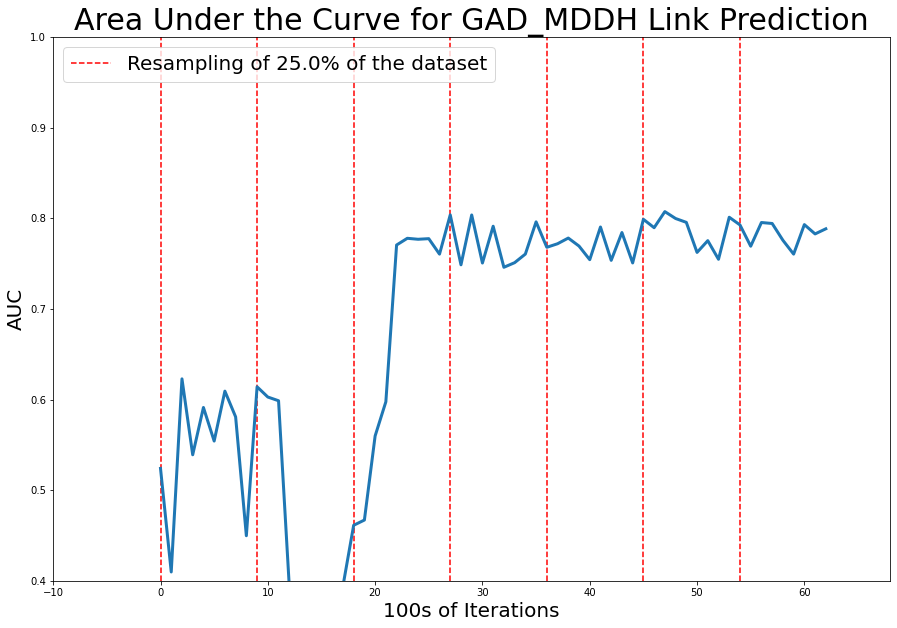

In [7]:
plt.figure(3, figsize=(15,10))
plt.axis([-10, auc_resample[len(auc_resample)-1] + 5, .4, 1])
for xc in auc_resample[:len(auc_resample)-1]: 
    line = plt.axvline(x = xc, color = 'r', linestyle='--')

plt.plot(auc_total, lw = 3)
plt.title("Area Under the Curve for " + dsm_type + " Link Prediction", size = 30)
plt.xlabel("100s of Iterations", size = 20)
plt.ylabel("AUC", size = 20)
plt.legend([line], ['Resampling of ' +  str(args.resample_rate*100) +'% of the dataset'], loc = 'upper left', fontsize = 20)
plt.savefig("determine_plots/" + dsm_type + "_" + str(int(args.resample_rate*100)) + "_" + str(args.iterations) + '_' + str(int(args.tsize*100)) + "_auc.jpg",  bbox_inches = 'tight')

In [8]:
columns = list(ncsr_age.columns)

dbatch = dgl.batch(dsm_all, ndata=['name-age'])

node_count = [[0]*len(columns)]*len(columns)


G = nx.DiGraph()
ndata = dbatch.ndata['name-age']
columns = list(ncsr_age.columns)


for x in columns: 
    G.add_node(x)
    
for idx, x in enumerate(test_pos_g.edges()[0]):
    from_node = columns[ndata[x][0]]
    to_node = columns[ndata[test_pos_g.edges()[1][idx]][0]]
    if G.has_edge(from_node, to_node):
        G[from_node][to_node]['w'] += pos_score[idx]
    else: 
        G.add_edges_from([(from_node, to_node)])
        G[from_node][to_node]['w'] = pos_score[idx]
    node_count[columns.index(from_node)][columns.index(to_node)] += 1



for x in columns: 
    for y in columns: 
        if G.has_edge(x, y):
            G[x][y]['w'] = G[x][y]['w']/node_count[columns.index(x)][columns.index(y)]


nx.write_gpickle(G, 'link_prediction_nx/DSM_'  + dsm_type + "_" + str(args.iterations) + '_' + str(int(args.resample_rate*100) ) + "-" + str(int(args.tsize*100)) + ".pkl")


In [9]:
test_pos_g.edata['weight'] = pos_score
nxg = test_pos_g.cpu().to_networkx(edge_attrs=['weight'])
mapping = {}
columns = list(ncsr_age.columns)
for idx, x in enumerate(dbatch.ndata['name-age']):
    x = x.tolist()
    mapping[idx] = columns[x[0]]
node_count = [[0]*len(columns)]*len(columns)

In [12]:
#G = nx.read_gpickle('link_prediction_nx/DSM_'  + dsm_type + "_" + str(args.iterations) + '_' + str(int(args.resample_rate*100) ) + "-" + str(int(args.tsize*100)) + ".pkl")
#ndata = dbatch.ndata['name-age']
columns = list(ncsr_age.columns)


for idx, x in enumerate(test_pos_g.edges()[0]):
    from_node = columns[ndata[x][0]]
    to_node = columns[ndata[test_pos_g.edges()[1][idx]][0]]
    if G.has_edge(from_node, to_node):
        G[from_node][to_node]['w'] += pos_score[idx]
    else: 
        G.add_edges_from([(from_node, to_node)])
        G[from_node][to_node]['w'] = pos_score[idx]
    node_count[columns.index(from_node)][columns.index(to_node)] += 1
edge_weights = []

for x in list(G.edges()):
    G[x[0]][x[1]]['w'] = float(G[x[0]][x[1]]['w']) / node_count[columns.index(x[0])][columns.index(x[1])]
    
for edge in G.edges():
    edge_weights.append(G[edge[0]][edge[1]]['w'])
edge_weights = [float(x) for x in edge_weights]



In [17]:
edge_weights_sub = []
wt = 0.2
for x in edge_weights: 
    if x> wt: 
        edge_weights_sub.append(x)

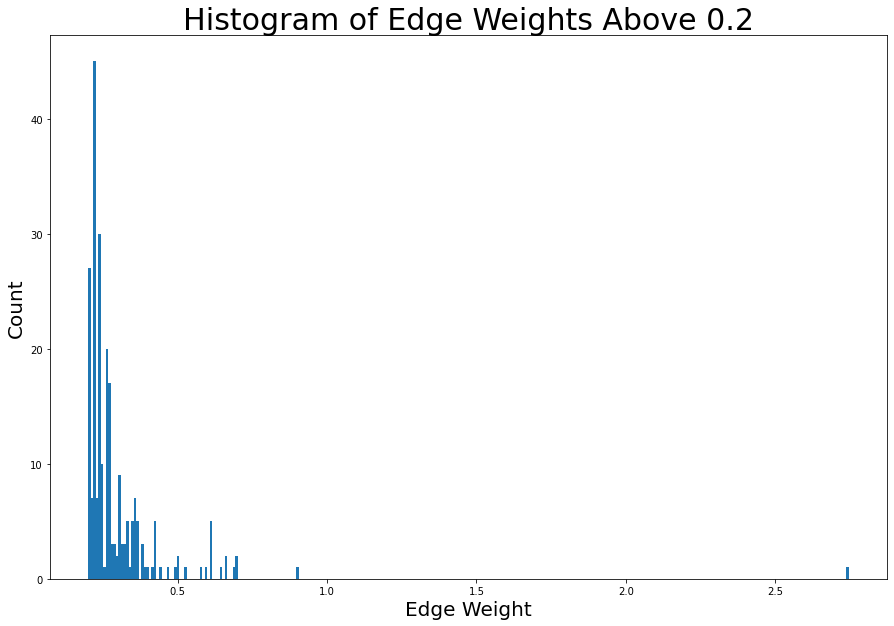

In [18]:
plt.figure(3, figsize=(15,10))
plt.title("Histogram of Edge Weights Above "+str(wt), size = 30)
plt.ylabel("Count", size = 20)
plt.xlabel("Edge Weight", size = 20)
plt.hist(edge_weights_sub, bins = 300)
plt.savefig("histograms/case_mad_gad_" + str(wt) + '.jpg',  bbox_inches = 'tight')

In [19]:
Gc = copy.deepcopy(G)
for x in columns: 
    for y in columns: 
        if Gc.has_edge(x, y) and x == y: 
            Gc. remove_edge(x, y)
        if Gc.has_edge(x, y) and Gc[x][y]['w'] < wt:
            Gc.remove_edge(x, y)
Gc.remove_nodes_from(list(nx.isolates(Gc)))

In [20]:
import ncsr_import
ncsr = ncsr_import.ncsr_data()

/home/georgia/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (910,953,3340,3518,3573,3581,3582,3583,3584,3616,3620,3711) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
#G = nx.read_gpickle('graph.pkl')
#G = main_graph
#pos = nx.kamada_kawai_layout(G, pos = nx.spring_layout(G, k = .15, iterations = 100, seed = 10020) )#

from networkx.drawing.nx_pydot import graphviz_layout
for idx, x in enumerate(list(nx.weakly_connected_components(Gc))):
    print(idx)
    Gc_sub = Gc.subgraph(x)
    pos = graphviz_layout(Gc_sub, prog="neato")

    #pos = nx.spring_layout(G, k = 4, iterations = 100, seed = 10020)
    levels = []
    vals = {}

    f = plt.figure(3, figsize=(30,30))

    #nx.draw_networkx(Gc, pos, arrowsize = 20)

    nx.draw_networkx(Gc_sub, pos, node_size= 3000, with_labels = True, edge_color = [x for x in list(nx.get_edge_attributes(Gc_sub, 'w').values())], arrowsize= 20, width = 3, edge_cmap = plt.get_cmap('Greens'),
                     edge_vmin = -1)#, connectionstyle="arc3,rad=.3")
    ax = []
    #for x in level_vals:
        #ax.append(.Line2D([], [], color=scalarMap.to_rgba(level_set.index(x) + 1), label = "Category: " + x, marker="o", markersize=20))
    #plt.legend(prop={'size': 20}, handles = ax)
    nx.draw_networkx_nodes(Gc_sub, pos, node_color = 'white', node_size = 2000)
    #nodes = nx.draw_networkx_nodes(G, pos, node_color = level_vals, vmax = max(level_vals) + .1, vmin = max(level_vals) - .1, node_size = 0)
    edges = nx.draw_networkx_edges(Gc_sub, pos, edge_color = [x for x in list(nx.get_edge_attributes(Gc_sub, 'w').values())], edge_cmap =  plt.get_cmap('Greens'), arrows=False, edge_vmin=-1, width = 0)
    edge_cbar = plt.colorbar(edges, orientation='horizontal', pad = 0.03)
    #node_cbar = plt.colorbar(nodes, orientation='horizontal', pad = 0)
    edge_cbar.set_label("Edge Prevalence", size = 25)
    #node_cbar.set_label("Node Prevalence", size = 25)
    plt.title("MDD/GAD Comorbid Network - Subgraph " + str(idx+1), fontsize = 40)#diag1 + " - " + diag2, fontsize = 40)
    bbox_props = dict(boxstyle= "round, pad =.4", ec = 'black', fc = 'white')
    g = r"$\bf{" + "Node" + "}$" + " " +  r"$\bf{" + "Descriptions:" + "}$" + "\n"
    for x in list(Gc_sub.nodes):
        g += x + ": " + ncsr.search_for_description(x)[1] + "\n" 
        t = plt.annotate(g, xy = (1.01,-.1), xycoords='axes fraction', bbox = bbox_props, size = 20)
    plt.savefig('dgl_graphs/case_mad_gad_' + str(idx) + '.jpg', bbox_inches = 'tight')
    plt.clf()


0
1
2
3
4
5
6
7


<Figure size 2160x2160 with 0 Axes>

In [ ]:
    from networkx.drawing.nx_pydot import graphviz_layout
    idx = 0
    gc_gen = [x for x in nx.weakly_connected_components(Gc)]
    x = gc_gen[idx]
    Gc_sub = Gc.subgraph(x)
    pos = graphviz_layout(Gc_sub, prog="neato")
    #pos = nx.spring_layout(G, k = 4, iterations = 100, seed = 10020)
    levels = []
    vals = {}

    f = plt.figure(3, figsize=(30,30))

    #nx.draw_networkx(Gc, pos, arrowsize = 20)

    nx.draw_networkx(Gc_sub, pos, node_size= 3000, with_labels = True, edge_color = [y for y in list(nx.get_edge_attributes(Gc_sub, 'w').values())], arrowsize= 20, width = 3, edge_cmap = plt.get_cmap('Greens'), edge_vmin = -1, connectionstyle="arc3,rad=.3")
    #ax = []
    #for x in level_vals:
        #ax.append(.Line2D([], [], color=scalarMap.to_rgba(level_set.index(x) + 1), label = "Category: " + x, marker="o", markersize=20))
    #plt.legend(prop={'size': 20}, handles = ax)
    nx.draw_networkx_nodes(Gc_sub, pos, node_color = 'white', node_size = 2000)
    #nodes = nx.draw_networkx_nodes(G, pos, node_color = level_vals, vmax = max(level_vals) + .1, vmin = max(level_vals) - .1, node_size = 0)
    edges = nx.draw_networkx_edges(Gc_sub, pos, edge_color = [x for x in list(nx.get_edge_attributes(Gc_sub, 'w').values())], edge_cmap =  plt.get_cmap('Greens'), arrows=False, edge_vmin=-1, width = 0)
    edge_cbar = plt.colorbar(edges, orientation='horizontal', pad = 0.03)
    #node_cbar = plt.colorbar(nodes, orientation='horizontal', pad = 0)
    edge_cbar.set_label("Edge Prevalence", size = 25)
    #node_cbar.set_label("Node Prevalence", size = 25)
    plt.title("MDD/GAD Comorbid Network - Subgraph " + str(idx+1), fontsize = 40)#diag1 + " - " + diag2, fontsize = 40)
    bbox_props = dict(boxstyle= "round, pad =.4", ec = 'black', fc = 'white')
    g = r"$\bf{" + "Node" + "}$" + " " +  r"$\bf{" + "Descriptions:" + "}$" + "\n"
    for x in list(Gc_sub.nodes):
        g += x + ": " + ncsr.search_for_description(x)[1] + "\n" 
        t = plt.annotate(g, xy = (1.01,-.1), xycoords='axes fraction', bbox = bbox_props, size = 20)
    plt.savefig('dgl_graphs/case_mad_gad_' + str(idx) + '.jpg', bbox_inches = 'tight')
    